### Plotting Trendlines in Asset Analysis
In this analysis, we use two distinct methods to plot trendlines on asset data graphs. Each method serves a different purpose and can offer insights into various aspects of the asset's price movements.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import sys

sys.path.append("..")
from utils.modules import Asset
from utils.functions import simulate_gbm_ohlc
from utils.trend_line_optimizer import fit_trendlines_high_low


plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 


## Get the historical data

- Input the symbol in the dataloader script, which downloads the csv into data folder
- Saves the csv into historical_data df

In [6]:
symbol = "tsla"
historical_data = pd.read_csv(f"../data/{symbol}_historical_data.csv")
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

tsla = Asset(historical_data, fractal=False)

## 1. Trendline Based on Pivot Points
### Description:

This method uses linear regression to fit trendlines based on the high and low prices of the asset. It provides a generalized view of support and resistance levels over the entire dataset.

## Process:

### Fitting Trendlines:

The generate_pivot_trend_lines method calculates trendlines by fitting a linear regression model to the high and low prices of the asset.
This approach provides a smoothed representation of overall support and resistance levels.
### Plotting:

The trendlines are plotted directly on the candlestick chart, representing general support and resistance levels across the entire dataset.

/Users/andrewcheam/Desktop/myProjects/TrendLine-Automation/src/../utils/modules.py:196: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


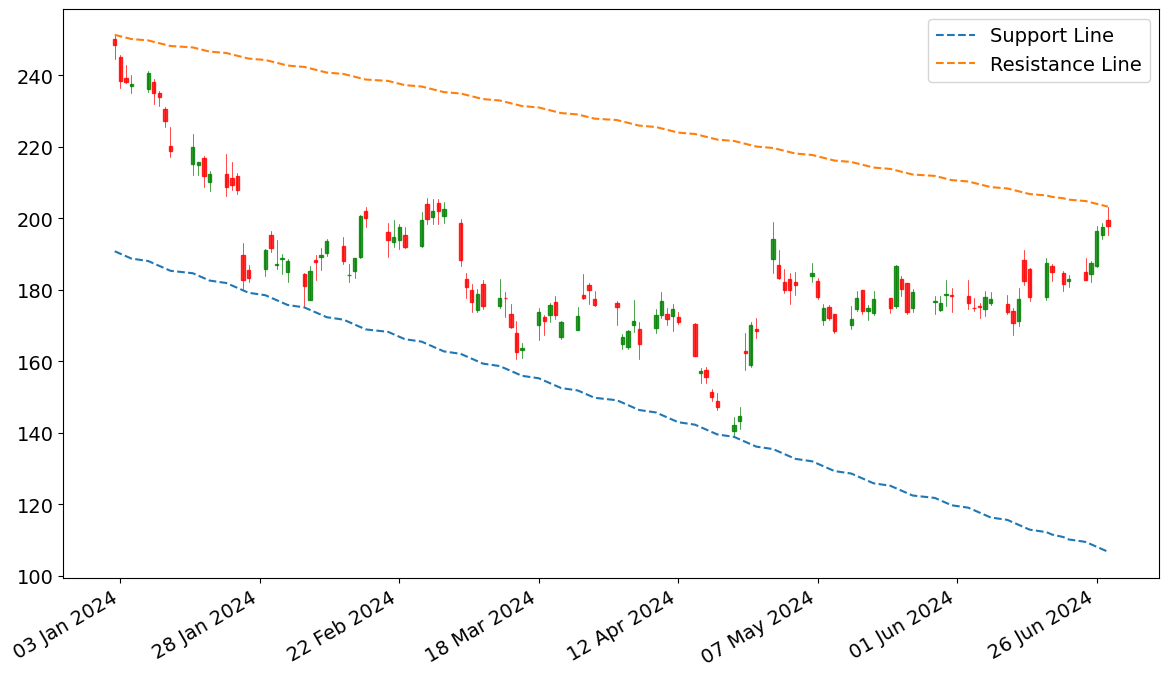

In [7]:
tsla.generate_pivot_trend_lines()




## 2. Trendline Based on Reversal Indexes
### Description:

This method plots trendlines based on specific reversal points identified in the asset's price data. These points are determined using local maxima and minima of the moving average or the close price.

## Process:

Identification of Reversal Points:

The get_reversal_indexes method identifies potential reversal points by examining the moving average of the closing prices.
Local maxima and minima are identified using the find_extrema method, which calculates local extrema in the price series.
### Generating Trendlines:

Trendlines are generated using combinations of the identified support and resistance points. The TrendLine class is used to create trendlines by fitting a linear regression model to these points.
The plot_fragment method plots these trendlines within a specified fragment of the historical data.
### Plotting:

The trendlines are plotted on the candlestick chart, with each trendline representing significant support or resistance levels based on the reversal points.


### Bugs to be resolved

Unable to plot correctly for the trend segments after the first segment

/Users/andrewcheam/Desktop/myProjects/TrendLine-Automation/src/../utils/modules.py:164: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


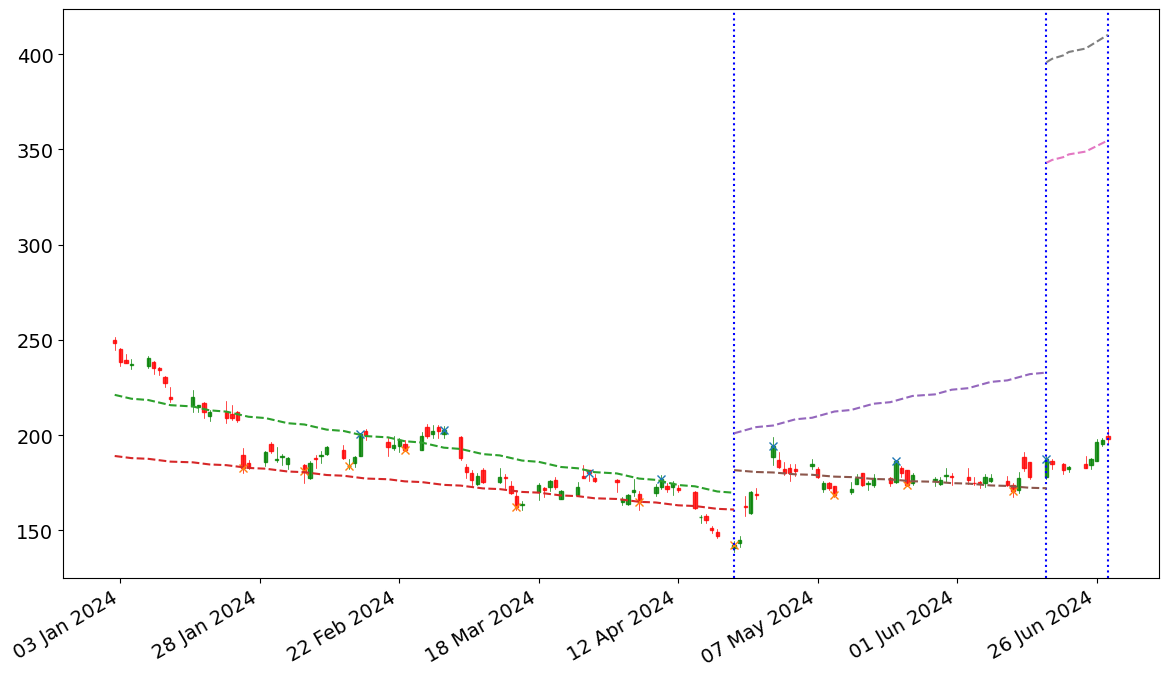

In [8]:
tsla.generate_fragment_trend_lines()


## Simulating a GBM

In [9]:
# Parameters
S0 = 100  # Initial price
mu = 0.05  # Drift
sigma = 0.2  # Volatility
T = 1.0  # 1 year
dt = 1/252  # Daily steps (assuming 252 trading days in a year)
N = 5  # Number of simulated paths

# Generate the OHLC data
ohlc_data = simulate_gbm_ohlc(S0, mu, sigma, T, dt, N)

# Example: Display the OHLC DataFrame for the first simulated path
ohlc_data[0].head()


,Open,High,Low,Close,Date
0,100.000000,100.804732,99.836060,100.639743,2023-01-02
1,100.055833,100.443172,99.968178,100.355255,2023-01-03
2,100.497468,100.740012,99.542095,99.782915,2023-01-04
3,100.464774,100.702691,98.855669,99.090331,2023-01-05
4,99.797056,101.098038,99.649810,100.949092,2023-01-06


/var/folders/t5/8fqbwc2d221c1h8pnz5m9nm40000gn/T/ipykernel_38877/2013907759.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


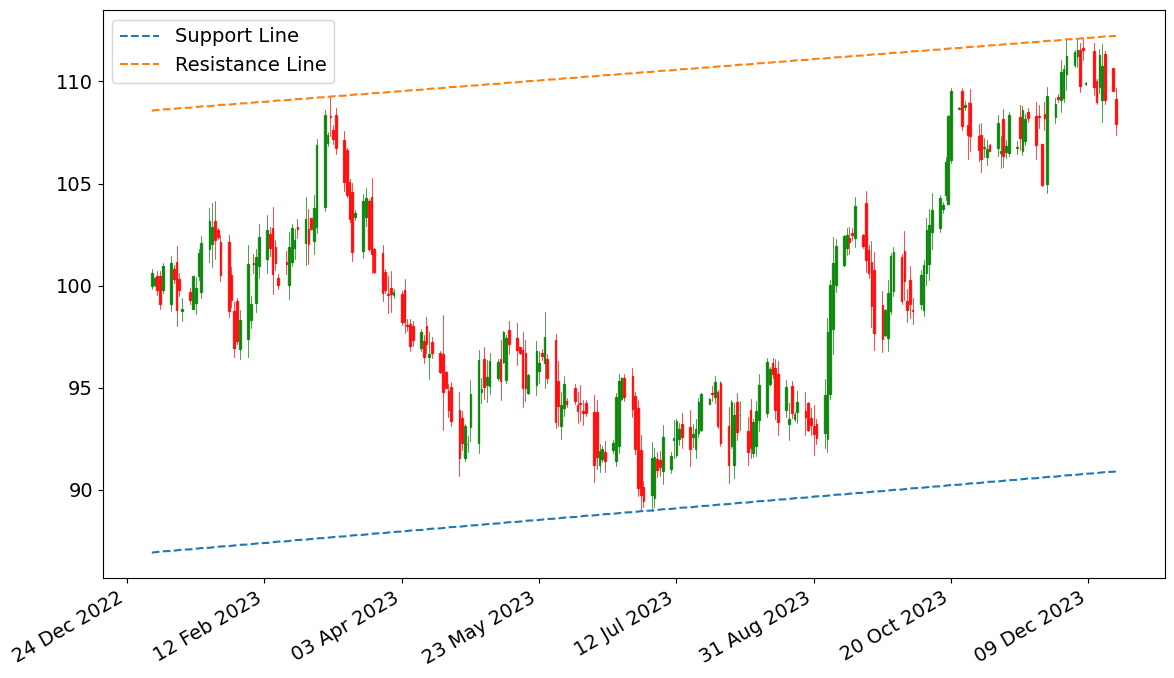

In [10]:
df = ohlc_data[0].copy()
support_coefs, resist_coefs = fit_trendlines_high_low(df['High'],df['Low'],df['Close'])
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]


fig, ax = plt.subplots()

candlestick_ohlc(ax,df.values,width=0.6, \
                colorup='green', colordown='red', alpha=0.8)


support_line = np.arange(len(df)) * support_coefs[0] + support_coefs[1]
resist_line = np.arange(len(df)) * resist_coefs[0] + resist_coefs[1]
plt.plot(df['Date'], support_line, label = "Support Line", linestyle = '--')
plt.plot(df['Date'], resist_line, label = "Resistance Line", linestyle = '--')
plt.legend()


date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.show()